<a href="https://colab.research.google.com/github/leekate/2020-ctrc-OralCancer-Classification-project/blob/master/Oral_Detect_mask_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# segmentation
https://deep-eye.tistory.com/4

# mask detection
http://machinelearningkorea.com/2019/09/13/open-image-dataset으로-보는-mask-rcnn-파이썬-치트코드/

#  착용하는 마스크 검출 대신 구강암 검출
https://electronicprogrammers.com/13

1) opencv를 이용해서 이미지 불러오기


2) 얼굴 검출을 통해서 얼굴 사진만을 데이터로 사용하기


3) ImageNet (ResNet50)을 이용해서 이미지에서 특성을 추출하기

4) 추출된 특성에서 주성분 분석을 통해서 Vector 만들기

5) 해당 Vector를 이용해서 SVM 만들고 학습시키기


In [1]:
import cv2
import os 

nomral_ori="/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/total/4.Normal"

file_list_ori = os.listdir(nomral_ori)
# print ("file_list: {}".format(file_list))
n=len(file_list_ori)
print("n=%d"%(n))
# print(file_list[0])


n=1137


In [2]:
# from google.colab.patches import cv2_imshow

# for i in range(1137):
#   img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/total/4.Normal/{}".format(file_list_ori[i]))
#   # 이미지 크기 변환
#   img = cv2.resize(img, dsize=(320,320), interpolation=cv2.INTER_LINEAR)
#   # 이미지 그레이스케일 변환
#   img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#   cv2.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/normal_oral/{}'.format(file_list_ori[i]),img)
#   cv2_imshow(img)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()

In [3]:
normal_oral="/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/normal_oral"

file_list_oral = os.listdir(normal_oral)
# print ("file_list: {}".format(normal_oral))
m=len(file_list_oral)
print("n=%d"%(m))

n=1137


In [4]:
# import matplotlib.pyplot as plt
# import numpy as np


# rand_Idx=np.random.chioce(1137)
# print("BGR image, Index: %d" %rand_Idx)
# plt.imshow(normal_oral[rand_Idx])

다음은 암이 있는 경우

In [5]:
import cv2
import os 

cancer_ori="/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/total/1.Cancer"

file_list = os.listdir(cancer_ori)
# print ("file_list: {}".format(file_list))
n=len(file_list)
print("n=%d"%(n))
# print(file_list[0])

n=410


In [6]:
# from google.colab.patches import cv2_imshow

# for i in range(1137):
#   img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/total/1.Cancer/{}".format(file_list[i]))
#   # 이미지 크기 변환
#   img = cv2.resize(img, dsize=(320,320), interpolation=cv2.INTER_LINEAR)
#   # 이미지 그레이스케일 변환
#   img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#   cv2.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/cancer_oral/{}'.format(file_list[i]),img)
#   cv2_imshow(img)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()


In [7]:
import cv2
import os 

cancer_oral="/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/cancer_oral"

file_list = os.listdir(cancer_oral)
# print ("file_list: {}".format(file_list))
n=len(file_list)
print("n=%d"%(n))
# print(file_list[0])

n=410


In [8]:
# import matplotlib.pyplot as plt

# rand_Idx=np.random.chioce(410)
# print("BGR image, Index: %d" %rand_Idx)
# plt.imshow(cancer_oral[rand_Idx])

https://ballentain.tistory.com/8

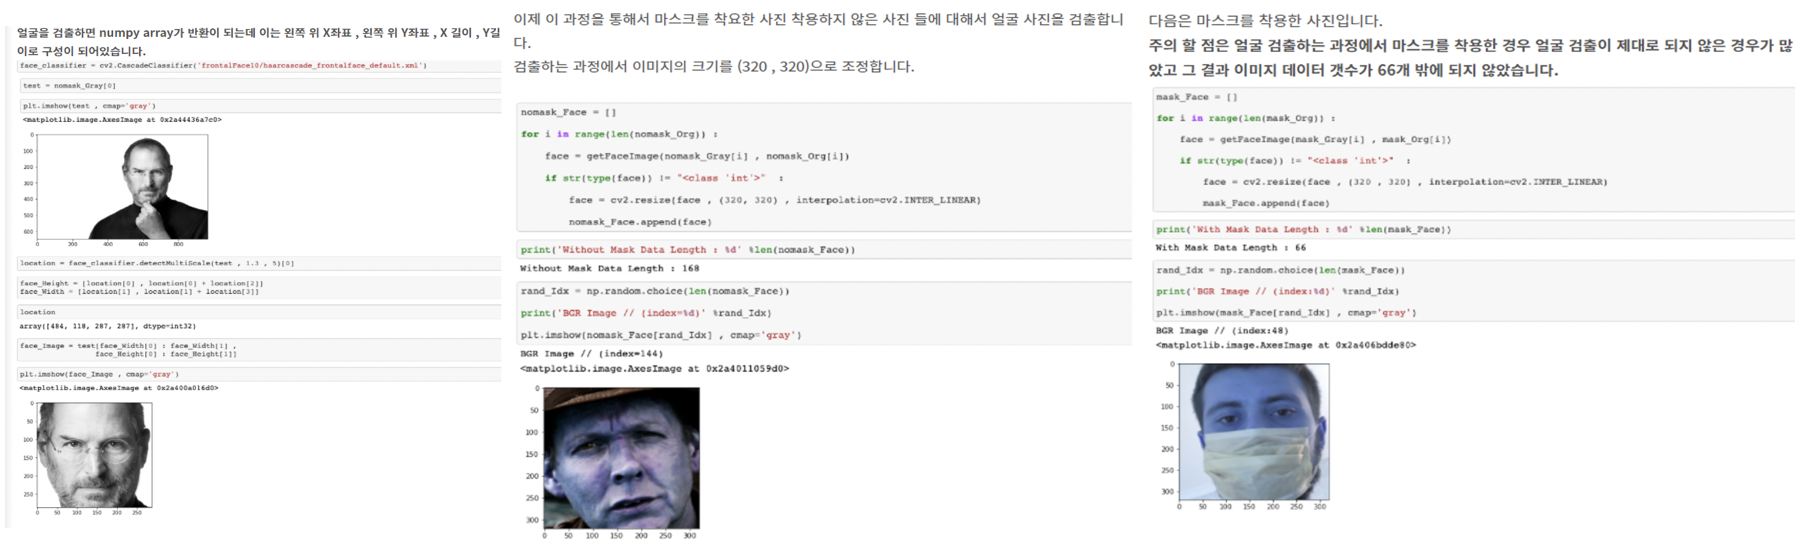


훈련/테스트 데이터로 분할 저장

In [9]:

cancer_oral="/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/cancer_oral"
file_list_cancer = os.listdir(cancer_oral)
normal_oral="/content/drive/Shareddrives/CTRC-OralDetect-Project/Mask/normal_oral"
file_list_normal = os.listdir(normal_oral)


In [10]:
def DataSplit(img,label,X_train,Y_train,X_test,Y_test):
  length=len(img)
  limit=int(0.7*length)

  for i in range(limit):
    X_train.append(img[i])
    Y_train.append(label)

  for i in range(limit,length):
    X_test.append(img[i])
    Y_test.append(label)


In [11]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

DataSplit(file_list_normal,-1,X_train,Y_train,X_test,Y_test)
DataSplit(file_list_cancer,1,X_train,Y_train,X_test,Y_test)
#SVM 사용 -> 정상 사진은 -1, 암 사진은 1로 label set

훈련 데이터 무작위로 재선정하기

In [12]:
import random

def DataShuffle(X,Y):
  Idx_list= list(range(len(X)))
  shuffle_list=random.sample(Idx_list,len(X))
  
  new_X=[]
  new_Y=[]

  for idx in shuffle_list:
    new_X.append(X[idx])
    new_Y.append(Y[idx])

  return new_X, new_Y

In [13]:
X_train,Y_train=DataShuffle(X_train,Y_train)
X_test,Y_test=DataShuffle(X_test,Y_test)

In [14]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

pre-trained model 불러오기

In [15]:
from keras.applications.resnet50 import ResNet50
import tensorflow

model=ResNet50(weights='imagenet',
               input_shape=(320,320,3),
               include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [16]:
print(X_train[2])

nor_124.jpg


In [17]:
print("X_train:  ",X_train)
print("len(X_train):  ", len(X_train))
print("X_train.shape:  ",X_train.shape)
#X_train=np.array(X_train)

print("===========================================================================================")
print("Y_train:  ",Y_train)
print("len(Y_train):  ", len(Y_train))
print("Y_train.shape:  ",Y_train.shape)

print("===========================================================================================")
print("X_test:  ",X_test)
print("len(X_test):  ", len(X_test))
print("X_test.shape:  ",X_test.shape)

print("===========================================================================================")
print("Y_test:  ",Y_test)
print("len(Y_test):  ", len(Y_test))
print("Y_test.shape:  ",Y_test.shape)


X_train:   ['nor_131.jpg' 'nor_308_2.jpg' 'nor_124.jpg' ... 'nor_308.jpg'
 'nor_43.jpg' 'nor_306_1.jpg']
len(X_train):   1082
X_train.shape:   (1082,)
Y_train:   [-1 -1 -1 ... -1 -1 -1]
len(Y_train):   1082
Y_train.shape:   (1082,)
X_test:   ['can_329.jpg' 'nor_247.jpg' 'nor_393.jpg' 'nor_412.jpg' 'nor_250_5.jpg'
 'nor_256.jpg' 'can_309.jpg' 'nor_383_1.jpg' 'nor_417.jpg' 'nor_400_1.jpg'
 'nor_250.jpg' 'can_354.jpg' 'nor_380.jpg' 'nor_251_2.jpg' 'can_371.jpg'
 'nor_234.jpg' 'nor_375_1.jpg' 'nor_239.jpg' 'nor_233_5.jpg' 'nor_369.jpg'
 'can_310.jpg' 'nor_244_4.jpg' 'can_274.jpg' 'can_370.jpg' 'nor_379.jpg'
 'nor_260.jpg' 'nor_254.jpg' 'can_315.jpg' 'nor_372_1.jpg' 'nor_378.jpg'
 'nor_251_4.jpg' 'nor_246_5.jpg' 'nor_231.jpg' 'nor_233_6.jpg'
 'can_374.jpg' 'nor_253.jpg' 'nor_356_1.jpg' 'can_304.jpg' 'nor_387_1.jpg'
 'nor_230.jpg' 'can_312.jpg' 'can_382.jpg' 'nor_258_6.jpg' 'can_296.jpg'
 'nor_249.jpg' 'nor_386_1.jpg' 'nor_235_4.jpg' 'nor_414_1.jpg'
 'nor_237_3.jpg' 'nor_241_4.jpg' 'can_361.

In [19]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 326, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 160, 160, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
X_train_predict=model.predict(X_train)
X_train_predict.shape #320,320,3 데이터가 변화 ->



# X_train_predict = model.predict_classes(X_train)
# X_train_predict.shape

ValueError: ignored

In [ ]:
X_train_predict_reshape=X_train_predict.reshape(len(X_train_predict),-1) #주성분 분석을 위헤 1차원으로 변경
X_train_predict_reshape.shape

In [ ]:
X_test_predict=model.predict(X_test)
X_test_predict.shape

In [ ]:
X_test_predict_reshape=X_test_predict.reshape(len(X_test_predict),-1)
X_test_predict_reshape.shape

주성분 분석:

주성분: 그 방향으로 데이터들의 분산이 가장 큰 방향 벡터를 의미

PCA:  데이터 하나하나에 대한 성분을 분석하는 것이 아닌 여러 데이터들이 모여 하나의 분포를 이룰 때 분포의 주성분을 분석하는 방법

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import svm

In [ ]:
#scale Transform
sf=StandardScaler()
sf.fit(X_train_predict_reshape)

X_train_scaled=sf.transform(X_train_predict_reshape)
X_test_scaled=sf.transform(X_test_predict_reshape)

In [ ]:
#reduce dimension
pca=PCA(n_componets=32,whiten=True)
pca=pca.fit(X_train_scaled)

X_train_pca=pca.transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)


학습시키기 SVM, 결과 보기

In [ ]:
from sklearn.svm import SVM

svm=SVC(kernel='rbf',C=10,gamma=0.01).fit(X_train_pca,Y_train)

In [ ]:
result=svm.predict(X_test_pca)

성능 측정

In [ ]:
acc=0.0
tp=0.0
fp=0.0

tp_length=0.0
fp_length=0.0

for i in range(len(Y_test)):
  if Y_test[i]==1:
    tp_length+=1
  else:
    fp_length+=1

  if Y_test[i]== result[i]:
    acc+=1
    if Y_test[i]==1:
      tp+=1
  else:
    if Y_test[i]==1:
      fp+=1


acc/=len(Y_test)
tp/=tp_length
fp/=fp_length

In [ ]:
print("SVM accuracy: %.3f" %acc)
print("SVM True Positive Rate: %.3f" %tp)
print("SVM False Positive Rate: %.3f" %fp)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 분류결과표 - 정답 : 행 / 예측 : 열
#confusion_matrix(y_pred, y_test)
confusion_matrix(result, Y_test)

# 오분류표
classification_report(result, Y_test)

# 분류정확도
accuracy_score(result, Y_test)